# Data Analysis

In [1]:
execution_mode = 'full'

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [General Observation](#General-Observation)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Summary](#Summary)
    - [Metadata Handover](#Metadata-Handover)

## Sample Records Analysis

In this section, the data file is loaded and some sample data records are shown.

In [2]:
import os
import json

records = []
path_data = './data'
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded', len(records))

Number of data records loaded 183407


In [3]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '700': [], '800':...","{'110': [], '710': [], '810': []}",1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...","{'110': [], '710': [], '810': []}",1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '700': [], '800': [], ...","{'110': [], '710': [], '810': []}",1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


In [4]:
print('Number of records {:d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format      

Swissbib data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [5]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [6]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '700': [], '800':...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [7]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes'], '700': ['SchayeghL...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph', ...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon'], '700': [], '...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate     {'110': ['St. Gallischer Hilfsverein'], '710':...
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [12]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

## General Observation

As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [13]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"700":[],"800":[],"245c":["André Schluchter"]},"corporate":{"110":[],"710":[],"810":[]},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"700":[],"800":[],"245c":["von Werner Naegeli"]},"corporate":{"110":[],"710":[],"810":[]},"pubyear":"1986 

A specific analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to its specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [14]:
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [15]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the upcoming chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [16]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

In [17]:
columns_metadata_dict['data_analysis_columns'] = []

### 035liste

In [18]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [19]:
daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [20]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [21]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [22]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


67821                  [(OCoLC)604125967, (IDSBB)004813794]
85065                                    [(RERO)R008894589]
76679                                       [(BISCH)287963]
43826        [(SERSOL)ssj0000665690, (WaSeSS)ssj0000665690]
169155                                         [(CEO)20212]
3322                   [(RERO)R005986328, (IDSBB)007011536]
55593     [(OCoLC)1033635654, (IDSLU)001343703, (OCoLC)1...
143517    [(BGR)000694255, (IDSBB)007052425, (DE-599)DNB...
23383                                    [(RERO)R008886610]
109860                                   [(RERO)R008898718]
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [23]:
columns_metadata_dict['strings_columns'] = ['century']

In [24]:
daf.find_empty_in_column(df, columns_metadata_dict, 'century')

Number of records with filled century 183407, with missing century 0 => 100.0%


Attribute $\texttt{century}$ holds strings of length 4 that can predominantly be interpreted as year-dates [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples and the top-most quantity distribution are shown below.

In [25]:
df['century'].sample(n=15)

40043     2017
54217     2018
74312     2004
117680    uuuu
50224     2012
71982     1919
161154    1995
75930     2018
142904    1996
168778    2002
161208    uuuu
39811     2010
181973    2019
122977    1980
80358     2018
Name: century, dtype: object

In [26]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [27]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [28]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

In [29]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

The following graph shows the publishing activity of Western European literature. Be aware that the displayed data is only an extract of the full Swissbib data, though.

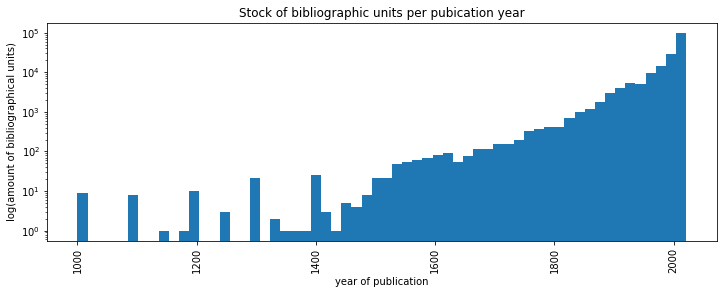

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

With its data extract [[SwRe](./A_References.ipynb#swre)], Swissbib forwards the year of publication of a bibliographic unit in attribute $\texttt{century}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)], if the bibliographic unit has been published in a specific year as may be the case for a regular book. If the bibliographic unit has been published during a time period, like for example a periodical, the first year of publication is stored [[WiCo2001](./A_References.ipynb#wico2001)].

In Swissbib's deduplication implementation, the attribute has a different meaning, though, holding the century of publication instead of its full year [[WiCo2001](./A_References.ipynb#wico2001)]. The data extract offers with $\texttt{decade}$ an additional attribute holding the same data as $\texttt{century}$. Even more, attributes $\texttt{exactDate}$ and $\texttt{pubyear}$ offer an extended version of attribute $\texttt{century}$. Due to these redundancies, the attribute will be dropped for the feature matrix and one of the extended attributes with the same data will be taken into account, see below.

In [31]:
#columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [32]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographical unit of format map.

In [33]:
daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [34]:
daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [35]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

110577    [E0055427, N0474810]
23588     [E0065226, N0470049]
113913                      []
31095     [E0081815, N0470212]
15768     [E0063759, N0463234]
25543                       []
114820    [E0062624, N0464709]
29273                       []
20507     [W1800000, N0900000]
90314     [E0080805, N0465203]
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [36]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

57054     [E0203500, E0201900, N0383100, N0383100]
112634    [E0073012, E0072931, N0464638, N0464758]
143472    [E0064728, E0064725, N0461460, N0461455]
137875    [E0074200, E0074200, N0463427, N0463400]
20644     [E0054415, E0054415, N0480000, N0480005]
145721    [E0053832, E0053842, N0465129, N0465123]
148518    [E0100200, E0100206, N0464600, N0464645]
145722    [E0071437, E0071441, N0462126, N0462130]
132971    [E0073924, E0073928, N0465238, N0465239]
137877    [E0102620, E0102615, N0463834, N0463830]
Name: coordinate, dtype: object

In [37]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [38]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. The contents of the field will be transformed with the help of a function $\texttt{.split}\_\texttt{coordinate()}$, [[WiCo2001](./A_References.ipynb#wico2001)].

In [39]:
df = dpf.split_coordinate(df)

The function extracts the first element of the list starting with letter 'E' for East or 'W' for West. It then normalizes the string to a string of length 8, removing all '.' and ' ' characters beforehand. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{E}$.

In [40]:
df.coordinate_E[df.coordinate_E.apply(lambda x : x!='')].sample(n=20)

114735    e0093317
126853    e0071430
146663    e0093201
86085     e0054801
54198     e0072733
106191    e0103600
20724     e0071843
145720    e0080227
25433     e0063800
30888     e0095930
105471    w0253100
62050     w0104200
81954     e0072400
11084     e0072600
15768     e0063759
114434    e0084418
114429    e0083724
114789    e0062617
104571    e0065253
114773    e0063304
Name: coordinate_E, dtype: object

As a next step, the same procedure is done with the first list element starting with letter 'N' for North or 'S' for South. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{N}$.

In [41]:
df.coordinate_N[df.coordinate_N.apply(lambda x : x!='')].sample(n=20)

57083     n0371000
27618     n0513600
103050    n0473652
28342     n0471309
4012      n0473500
62050     n0562100
81097     n0450300
18205     n0465643
182747    n0465350
103720    n0420700
56848     n0465643
104817    n0473522
126867    n0465345
137875    n0463427
48996     n0344500
114775    n0465655
105364    n0000000
35991     n0460520
70851     n0472630
5102      n0471300
Name: coordinate_N, dtype: object

In [42]:
print('East / west coordinates? ', df.coordinate_E.str[0].unique())
print('North / south coordinates? ', df.coordinate_N.str[0].unique())

East / west coordinates?  [nan 'e' 'w']
North / south coordinates?  [nan 'n' 's']


Both new attributes are used for further processing, while the original attribute $\texttt{coordinate}$ is dropped.

In [43]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [44]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three different key value pairs. For a first analysis in this subsection, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary using a special function $\texttt{.transform}\_\texttt{dictionary}\_\texttt{to}\_\texttt{list()}$. The values then come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [45]:
df.corporate.sample(n=20)

178022                    {'110': [], '710': [], '810': []}
65206                     {'110': [], '710': [], '810': []}
31293                     {'110': [], '710': [], '810': []}
149511    {'110': ['United States Olympic Committee'], '...
90897                     {'110': [], '710': [], '810': []}
97285                     {'110': [], '710': [], '810': []}
122673                    {'110': [], '710': [], '810': []}
127018                    {'110': [], '710': [], '810': []}
37001                     {'110': [], '710': [], '810': []}
89397                     {'110': [], '710': [], '810': []}
75125                     {'110': [], '710': [], '810': []}
69944                     {'110': [], '710': [], '810': []}
155234                    {'110': [], '710': [], '810': []}
130726                    {'110': [], '710': [], '810': []}
104738                    {'110': [], '710': [], '810': []}
86472                     {'110': [], '710': [], '810': []}
43917       {'110': [], '710': ['ebrary,

In [46]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%


Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%


Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographical units are units produced by persons, not corporates.

In [47]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [48]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [49]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,verein deutscher bibliothekareregionalverband ...,verein deutscher bibliothekareregionalverband ...
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,heilsarmeenationales hauptquartier bern,salvation armynationales hauptquartier
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [50]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

153648    panathlon international. congrès international...
158877                     union internationale de biathlon
157792    summer olympic games. organizing committee. 11...
149737    summer olympic games. organizing committee. 15...
170044                      international olympic committee
169932    olympic winter games. organizing committee . 2...
151499                              walt disney productions
15753                                schweizschweizer armee
164713    summer olympic games. organizing committee. 19...
114799               eidgenössisches topographisches bureau
156260                        comité paralimpico venezolano
160551    international olympic committee. olympic cultu...
154743    fédération internationale d'escrime. congrès m...
86084                                charles vögele holding
154356    summer olympic games. organizing committee. 25...
160700                          olympic council of malaysia
125777                         spinas ci

In [51]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

124446    verband deutscher elektrotechnikerwissenschaft...
144281    gran teatro del liceoorquesta sinfónica, gran ...
102397                          galeria sztuki współczesnej
47966     association michel parmentier, musée villa tam...
11625                                               healers
7374      bernisches historisches museum, staatsseminar ...
92117                                  kunstmuseum (luzern)
25031                          fundação calouste gulbenkian
12155                                         the cardigans
16448                                    london sinfonietta
106142    dachverband offene kinder- und jugendarbeit sc...
60210     università degli studi di baricentro di studi ...
35960              international organization for migration
95546     schweizerische zwirnerei-genossenschaft, ostsc...
154996                        lawn tennis association trust
79758                              art institute of chicago
129910                                 s

In [52]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

143892    judge advocate general's school (united states...
94678                                             hécatombe
25428                 schweizbundesamt für landestopografie
106184                              hallwag kümmerly + frey
106150                              hallwag kümmerly + frey
110576                                            hema maps
122278                  deutschlandverteidigungsministerium
17859                 schweizbundesamt für landestopografie
25406                 schweizbundesamt für landestopografie
133537                schweizbundesamt für landestopografie
53969                 schweizbundesamt für landestopografie
110586                              hallwag kümmerly + frey
138344                schweizbundesamt für landestopografie
106179                              hallwag kümmerly + frey
115817                  deutschlandverteidigungsministerium
110569                              hallwag kümmerly + frey
104826                            usadep

In [53]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080     {'110': [], '710': [], '810': ['Wirtschaftsuni...
47145     {'110': ['Biochemical Society (Great Britain)S...
52134     {'110': [], '710': ['Kunsthandlung Helmut H. R...
94673     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94674     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94678     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94679     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94680     {'110': [], '710': ['Ensemble Batida', 'Hécato...
113869    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
113870    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
133706    {'110': ['Carnegie Endowment for International...
133739    {'110': [], '710': [], '810': ['DeutschlandVer...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

The contents of attribute $\texttt{corporate}$ results from varying interpretation and filling. Some institutions have used key 110 and others 710 as their leading corporate data field. Swissbib's recommendation therefore is to concatenate the two remaining $\texttt{corporate}$ fields into one single $\texttt{corporate}$ field [[WiCo2001](./A_References.ipynb#wico2001)]. The two remaining attributes will be taken into one and will be processed as one singe attribute in the feature matrix generation. This will be implemented in a separate function $\texttt{.concatenate}\_\texttt{corporate}\_\texttt{keys()}$, the result of which is shown below for some sample cases.

In [54]:
df = dpf.concatenate_corporate_keys(df)
df[['corporate_full', 'corporate_110', 'corporate_710']].loc[[0, 6, 1852, 14405, 183000, 183009]]

,corporate_full,corporate_110,corporate_710
0,,,
6,christkatholische kirchgemeinde (bern),,christkatholische kirchgemeinde (bern)
1852,the keywords project,the keywords project,
14405,zéphyr combo,zéphyr combo,zéphyr combo
183000,fbm communications (zürich) theater 11 (zürich),fbm communications (zürich),theater 11 (zürich)
183009,spinas civil voices (zürich) fairmed (bern),spinas civil voices (zürich),fairmed (bern)


In [55]:
len(df['corporate_full'].loc[0])

0

In [56]:
display(df.corporate_full[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20))
display(df.corporate_full[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20))

25056                      reise know-how verlag peter rump
168903    olympic winter games. organizing committee. 20...
150578                    st petersburg 2004 candidate city
167715    olympic winter games. organizing committee. 23...
157885                                      groupe de paris
150408                    musée-galerie de la seita (paris)
153928    summer olympic games. organizing committee. 31...
162957    international olympic committee international ...
151082    beijing university what makes a champion forum...
152790    summer olympic games. organizing committee. 11...
151923    summer olympic games. organizing committee. 29...
158396                          comité olímpico ecuatoriano
154983    olympic winter games. organizing committee. 17...
163327    jeux de la péninsule du sud-est asiatique. com...
149179    olympic winter games. organizing committee. 18...
160798         centre international pour la trêve olympique
165227                                  

145623                                  sic! raum für kunst
80487                                      canal 9 (sierre)
151428                                  maccabi world union
3511                                               megadeth
73415           eidgenössische technische hochschule zürich
87567     zhong guo guang xue gong cheng xue hui, zhongg...
139337                    schweizerische normen-vereinigung
11498                                erich fischer quartett
18733     arbeitsausschuss der vereinigten ärztlichen or...
82360                       schweizerische grossloge alpina
29266                        whitney museum of american art
57544                                   kunstmuseum (basel)
32360         kunstmuseum st. gallen, atelier otto rietmann
61561                                          didactmedia®
167829                      international olympic committee
60956     schweizerischer centralverein vom roten kreuzk...
83610                european institute 

In [57]:
columns_metadata_dict['data_analysis_columns'].append('corporate_full')

### decade

In [58]:
columns_metadata_dict['strings_columns'].append('decade')

In [59]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Attribute $\texttt{decade}$ holds identical data to attribute $\texttt{century}$, out of Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], see above and its identical MARC 21 definition [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The purpose of the field in Swissbib's conventional deduplication implementation is to hold the decade of the year of origin of a bibliographic unit and store it for comparison [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ with an extension of the data of this attribute. Therefore, attribute $\texttt{decade}$ will be dropped for further processing.

### docid

In [60]:
columns_metadata_dict['strings_columns'].append('docid')

In [61]:
daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [62]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [63]:
columns_metadata_dict['list_columns'].append('doi')

In [64]:
daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 9553, with missing doi 173854 => 5.2%


Attribute $\texttt{doi}$ is a digital object identifier. As specified in [[MARC](./A_References.ipynb#marc21)], the field holds several standard numbers [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The attribute holds a list of string elements. Some samples are shown below.

In [65]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1899         [10.5451/unibas-007052902]
1937         [10.5451/unibas-007052953]
4710           [10.14361/9783839445334]
10480        [10.5451/unibas-007052913]
11917       [10.1007/978-1-4939-6572-4]
15775    [10.5771/1439-880X-2018-3-362]
16124            [10.3931/e-rara-74297]
16194           [10.4324/9781138604391]
16212            [10.3931/e-rara-74297]
16219            [10.3931/e-rara-74297]
16222            [10.3931/e-rara-74297]
16244            [10.3931/e-rara-74297]
16245            [10.3931/e-rara-74297]
16256            [10.3931/e-rara-74297]
16265           [10.4324/9781315562193]
16301           [10.4324/9781315692845]
16354            [10.3931/e-rara-74439]
16356                  [10.3726/b14897]
16447           [10.4324/9781315150918]
16637          [10.1186/1478-4505-8-31]
Name: doi, dtype: object

In [66]:
df.doi[df.doi.apply(lambda x : len(x))>0].sample(n=20)

97803                       [10.1016/j.cortex.2018.10.020]
96264                               [10.5169/seals-789737]
97802                          [10.1186/s41937-019-0028-4]
130484                                 [10.7312/stei15138]
46951                          [10.1007/978-3-319-89590-1]
122357                         [10.1186/s12889-018-5783-0]
115218                             [10.3917/arss.193.0096]
41020                              [10.1515/9783111496788]
123379    [10.5167/uzh-164839, 10.1038/s41467-018-07945-w]
74151                          [10.1186/s12912-018-0323-x]
37712                          [10.1007/978-3-319-67691-3]
82647         [10.5167/uzh-167335, 10.24921/2018.94115924]
58345                                 [10.5167/uzh-161177]
34291                                  [10.5167/uzh-93627]
46201                              [10.1524/9783486719888]
34388                        [10.1183/13993003.01359-2018]
123809                      [10.1371/journal.pmed.100274

In [67]:
df.loc[51889]

docid                                                     554871254
035liste          [(VAUD)991021210193902852, (CKB)41000000059582...
isbn                                                [3-319-93133-4]
ttlfull           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
ttlpart           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
person            {'100': [], '700': ['ShakoorAbdul', 'CatoKerry...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    2019    
decade                                                         2019
century                                                        2019
exactDate                                                  2019    
edition                                               1st ed. 2019.
part                                                             []
pages                               [1 online resource (122 pages)]
volumes                             [1 online re

In [68]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.doi.apply(lambda x : len(x))))

9,553 records hold 1 list element(s).
2,232 records hold 2 list element(s).


=> Maximum number of list elements 2


Swissbib's deduplication implementation compares only real doi identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real doi identifiers can be found with the help of a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a doi can be identified as a string starting with '10.'. Furthermore, each row in the data has a maximum of 1 real doi identifier [[WiCo2001](./A_References.ipynb#wico2001)]. This logic will be used to isolate the real doi from all non-doi identifiers in a row. A function $\texttt{.reduce}\_\texttt{to}\_\texttt{doi}\_\texttt{element()}$ has been implemented that takes care of this isolation and stores only real doi identifiers in attribute $\texttt{doi}$.

In [69]:
df = dpf.reduce_to_attrib_element(df, 'doi')

In [70]:
df.doi[df.doi.apply(lambda x : len(x)>0)].sample(n=20)

102688           10.23941/ejpe.v6i3.151
100320             10.3931/e-rara-75571
97599              10.5169/seals-791078
94856                10.5167/uzh-165546
97516              10.5169/seals-790929
34325                10.5167/uzh-126799
99782                10.5167/uzh-167397
97835     10.1021/acs.jproteome.8b00485
75086                10.5167/uzh-166352
54611                    10.3726/b14804
126532               10.5167/uzh-162633
96317              10.5169/seals-790214
37367             10.1524/9783486705744
147335            10.3139/9783446456679
89553             10.7591/9781501721779
104871        10.1186/s12959-018-0182-4
125876       10.1016/j.ejmp.2018.12.001
102963               10.5167/uzh-160147
148103               10.5167/uzh-169291
51952         10.1007/978-3-319-96526-0
Name: doi, dtype: object

In [71]:
columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [72]:
columns_metadata_dict['strings_columns'].append('edition')

In [73]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [74]:
edition_sample_index = df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=20).index
df.edition.loc[edition_sample_index]

56014                   3rd edition
30058                 First edition
135786              Originalausgabe
27624                        Shohan
78590                      Sonderbd
178516            Troisième édition
74776                         4a ed
48349                  Originalausg
71397                       Nachdr.
131999         [Verschiedene Aufl.]
171364              2nd New edition
46428                 1st ed. 2019.
48329     Gekürzte Ausg., 70.-74.Td
40327                        1st ed
127270                      1. Aufl
15407                Original: 1967
138485                   1. Auflage
3268                  Lizenzausgabe
102573                   2. Auflage
56538     2., überarbeitete Auflage
Name: edition, dtype: object

Swissbib's deduplication logic normalizes this attribute strongly [[WiCo2001](./A_References.ipynb#wico2001)]. Goal of their normalization process is to treat different variants of the edition statements in the same way. The normalization comprises mainly extracting and isolating number digits out of the original string of the attribute. But also, they convert words expressing numbers to number digits. The first part of their normalization process, extracting number digits, will be done as well in this capstone project. For this purpose, a special function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string()}$ has been implemented for attribute $\texttt{edition}$.

In [75]:
df = dpf.isolate_number_from_string(df, 'edition')
df.edition.loc[edition_sample_index]

56014        3
30058         
135786        
27624         
78590         
178516        
74776        4
48349         
71397         
131999        
171364       2
46428        1
48329       70
40327        1
127270       1
15407     1967
138485       1
3268          
102573       2
56538        2
Name: edition, dtype: object

In [76]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 16390, with missing edition 167017 => 8.9%


As a result of this processing of attribute $\texttt{edition}$, the numer of filles rows is still reduced.

In [77]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [78]:
columns_metadata_dict['strings_columns'].append('exactDate')

In [79]:
daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [80]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [81]:
df.exactDate[df.exactDate.str[4:].str.contains('\D')].unique()

array(['1992    ', '1986    ', '1923    ', ..., '1966-196', 'uuu1    ',
       '201007  '], dtype=object)

Missing information is not only added with the help of character 'u', but with ' ' (space character) and even '-' characters, unfortunately. For data cleaning resons, any character that is not a number digit will be replaced by 'u'.

In [82]:
def determine_uniques_non_numbers(exact_date):
    unique_non_numbers = set()

    for i in range(4, 8):
        unique_non_numbers = unique_non_numbers.union(set(exact_date.str[i:i+1][
            exact_date.str[i:i+1].str.contains('\D')].unique()))

    print('Non-digit characters are', unique_non_numbers)

    return

determine_uniques_non_numbers(df.exactDate)

Non-digit characters are {' ', 'u', '-'}


In [83]:
def print_degree_of_filling(exact_date):
    print('Degree of non-number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('\D')].count()/len(df)*100))
    print('Degree of full and exclusively number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('[0-9]{4}')].count()/len(df)*100))
    return

print_degree_of_filling(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%


Degree of full and exclusively number filling of last 4 digits 12.6%


In [84]:
df = dpf.clean_exactDate_string(df)

print_degree_of_filling(df.exactDate)
determine_uniques_non_numbers(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


Non-digit characters are {'u'}


In [85]:
df.loc[183319]

docid                                                     556987284
035liste                         [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                             []
ttlfull           {'245': ['Altered limbic and autonomic process...
ttlpart           {'245': ['Altered limbic and autonomic process...
person            {'100': [], '700': ['TemplinChristian', 'Hängg...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    20190414
decade                                                         2019
century                                                        2019
exactDate                                                  20190414
edition                                                            
part                                             [40(15):1183-1187]
pages                                                            []
volumes                                         

Attribute $\texttt{exactDate}$ holds the same values like attribute $\texttt{pubyear}$, see below. In comparison with $\texttt{century}$ and $\texttt{decade}$, the full years of publication of a bibliographic unit are stored in the first four digits of the attribute [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. For bibliographical units that appear over a time period, the second four digits correspond to the last year of publication. In case of units that appear within one year, the second four digits may hold the copyright date or the original year of publication of a reprint may be stored, instead. For some bibliographical units, it is possible that the attribute holds month and day indication instead of a year in the last four digits [[WiCo2001](./A_References.ipynb#wico2001)].

The MARC data declares explicitly the kind of value, the second four digits are about. This specification is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Swissbib treats such differences in a varying way in its deduplication implementation, depending on the specific kind of value. Due to its full information supply, attribute $\texttt{exactDate}$ is taken as is to the feature matrix. The attribute will be taken as full placeholder for the three attributes $\texttt{century}$, $\texttt{decade}$, and $\texttt{pubyear}$.

In [86]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [87]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis). Swissbib's deduplication implementation splits this attribute for its comparison logic and uses only parts of it [[WiCo2001](./A_References.ipynb#wico2001)].
- The full code is used for values starting with VM01, VM02, MU03, MU04, and CF01.
- The first four and last two digits are used fo all other values of the attribute.

In [88]:
daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [89]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

97083     bk010053
159602    bk020000
60922     bk020053
170877    bk020000
132678    bk020000
82487     bk020000
105654    bk010000
145587    bk020053
85266     bk010000
31083     mp010300
Name: format, dtype: object

In [90]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [91]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

156960    
170957    
169952    
169080    
152459    
158873    
169876    
169251    
171021    
161559    
Name: format, dtype: object

In [92]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [93]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of a bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and and an inferior reliability due to freedom of interpretation. For this capstone project, a different processing of the attribute compared to the Swissbib implementation is tested. The attribute is divided into two new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the 6 subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [94]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
115882,cr030300,cr,030300
153546,bk020000,bk,020000
175394,bk020000,bk,020000
32871,bk020053,bk,020053
56233,bk020000,bk,020000
27612,bk010400,bk,010400
149614,bk020000,bk,020000
129671,bk020053,bk,020053
12763,mu040100,mu,040100
29719,bk020053,bk,020053


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format()}$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py)

In [95]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [96]:
columns_metadata_dict['list_columns'].append('isbn')

In [97]:
daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


Attribute $\texttt{isbn}$ holds two different kinds of information, the ISBN or the ISSN of a bibliographic unit. The ISBN is the identifier for monographs, while the ISSN identifies periodicals. An ISBN is either of length 10 or of length 13, an ISSN is of length 8. Due to this length attribution, it is not relevant whether the field holds an ISBN or an ISSN.

In [98]:
df.isbn[df.isbn.apply(lambda x : len(x)==1 )].sample(n=20)

36783     [3-11-014411-5 (acidfree)]
53473            [978-0-472-12424-4]
86343            [978-1-5106-1967-8]
88201            [978-88-203-8622-1]
97748            [978-84-947754-8-2]
28117            [978-3-85445-647-6]
92370            [978-3-03796-556-6]
131238           [978-1-4054-1438-8]
57559            [978-2-7556-4063-2]
125717           [978-3-7780-2860-5]
122273           [978-0-8157-3257-0]
115569           [978-1-5310-1404-9]
19231            [978-3-401-70604-7]
103145           [978-3-8394-4377-4]
6728             [978-3-89899-533-7]
92645            [978-2-07-059365-1]
100229           [978-1-108-55194-6]
170075               [83-89227-30-4]
172996           [978-1-138-50032-7]
130714           [978-2-275-03856-8]
Name: isbn, dtype: object

The attribute is a list of string elements. Some samples with exactly one string element are shown above, some samples with more than one string element are shown below.

In [99]:
df.isbn[df.isbn.apply(lambda x : len(x)>1 )].sample(n=20)

17824                    [978-3-945530-11-5, 3-945530-11-3]
125525                   [978-3-551-25129-9, 3-551-25129-0]
137282                       [0-07-182273-9, 0-07-182272-0]
176252                [0-8039-8228-3, 0-8039-8229-1 (pbk.)]
39861     [978-3-527-62869-8, 3-527-62869-X (Online Reso...
59037                    [978-3-506-79218-1, 3-506-79218-0]
123905               [978-3-658-13605-5, 978-3-658-13606-2]
134288               [978-0-7432-9643-4, 978-0-7432-9644-1]
126601                   [978-88-6312-332-6, 88-6312-332-2]
75639                    [978-3-17-032573-9, 3-17-032573-6]
78666                    [1-58510-880-4, 978-1-58510-880-0]
116221                   [978-88-7814-835-2, 88-7814-835-0]
68542                    [90-70149-12-5, 978-90-70149-12-3]
35228                    [978-4-334-04360-5, 4-334-04360-7]
36693                    [978-1-5386-9160-1, 1-5386-9160-4]
101773                   [0-19-085423-5, 978-0-19-085423-2]
114418               [978-981-323-722-3,

In [100]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.isbn.apply(lambda x : len(x))))

80,688 records hold 1 list element(s).
29,073 records hold 2 list element(s).


3,762 records hold 3 list element(s).
2,331 records hold 4 list element(s).


519 records hold 5 list element(s).
398 records hold 6 list element(s).


173 records hold 7 list element(s).
156 records hold 8 list element(s).


84 records hold 9 list element(s).
76 records hold 10 list element(s).


51 records hold 11 list element(s).
43 records hold 12 list element(s).


29 records hold 13 list element(s).
26 records hold 14 list element(s).


19 records hold 15 list element(s).
18 records hold 16 list element(s).


10 records hold 17 list element(s).
9 records hold 18 list element(s).


8 records hold 19 list element(s).
7 records hold 20 list element(s).


7 records hold 21 list element(s).
7 records hold 22 list element(s).


7 records hold 23 list element(s).
7 records hold 24 list element(s).


5 records hold 25 list element(s).
4 records hold 26 list element(s).


3 records hold 27 list element(s).
3 records hold 28 list element(s).


3 records hold 29 list element(s).
3 records hold 30 list element(s).


1 records hold 31 list element(s).
1 records hold 32 list element(s).


1 records hold 33 list element(s).
1 records hold 34 list element(s).


1 records hold 35 list element(s).
1 records hold 36 list element(s).


1 records hold 37 list element(s).
1 records hold 38 list element(s).


1 records hold 39 list element(s).
1 records hold 40 list element(s).


1 records hold 41 list element(s).
1 records hold 42 list element(s).


=> Maximum number of list elements 42


In [101]:
max(df.isbn.apply(lambda x : len(x)))

42

In [102]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

113064    [978-4-469-22249-4, 4-469-22249-6, 978-4-469-2...
115721    [7-5633-1178-5, 7-5633-1323-0, 7-5633-1699-X, ...
172802    [0-08-043748-6, 0-08-044323-0, 0-08-044324-9, ...
28221     [978-3-7910-2601-5, 978-3-7910-2602-2, 978-3-7...
30782     [978-0-19-438433-9, 0-19-438433-0, 978-0-19-43...
126999    [978-1-315-60322-3, 1-315-60322-5, 0-7546-7843...
30911     [3-292-00248-6, 3-03713-014-8, 3-292-00249-4, ...
116180    [978-7-5619-3903-1, 7-5619-3903-5, 978-7-5619-...
78410     [978-2-35241-063-8, 978-2-911565-89-2, 978-2-3...
19427     [978-0-85785-338-7, 978-1-350-07783-6, 978-1-3...
Name: isbn, dtype: object

Attribute $\texttt{isbn}$ is taken to further processing as the list of string elements with their values as they are.

In [103]:
columns_metadata_dict['data_analysis_columns'].append('isbn')

### ismn

In [104]:
columns_metadata_dict['list_columns'].append('ismn')

In [105]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 931, with missing ismn 182476 => 0.5%


Attribute $\texttt{ismn}$ holds the same data like attribute $\texttt{doi}$ [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [106]:
i = 0
while len(df.ismn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.ismn.apply(lambda x : len(x))))

931 records hold 1 list element(s).


123 records hold 2 list element(s).


30 records hold 3 list element(s).


9 records hold 4 list element(s).


4 records hold 5 list element(s).


4 records hold 6 list element(s).


2 records hold 7 list element(s).


1 records hold 8 list element(s).


1 records hold 9 list element(s).


1 records hold 10 list element(s).


1 records hold 11 list element(s).


1 records hold 12 list element(s).


1 records hold 13 list element(s).


1 records hold 14 list element(s).


1 records hold 15 list element(s).


1 records hold 16 list element(s).


1 records hold 17 list element(s).


1 records hold 18 list element(s).


1 records hold 19 list element(s).


1 records hold 20 list element(s).


1 records hold 21 list element(s).


1 records hold 22 list element(s).


1 records hold 23 list element(s).


1 records hold 24 list element(s).


1 records hold 25 list element(s).


1 records hold 26 list element(s).


=> Maximum number of list elements 26


In [107]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

18787           [9790013230075, 9790013230075, M013230075]
21159           [9790013230068, M013230068, 9790013230068]
27903    [9790206300349, 9790206300448, 9790206300370, ...
36355        [9790261242936, 9790261242943, 9790261243407]
46239    [9790674521482, 9790674521499, 9790674521482, ...
Name: ismn, dtype: object

Analogous to attribute $\texttt{doi}$, Swissbib's deduplication implementation compares only real ismn identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real ismn numbers can be identified by a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a real ismn number can be identified as a number starting with a letter 'm' (or 'M') or with the three number digits '979'. Each row in the data has a maximum of 1 real ismn identifyer [[WiCo2001](./A_References.ipynb#wico2001)].

In [108]:
df_temp = dpf.transform_list_to_string(df.copy(), 'ismn')
df_temp.ismn[df_temp.ismn.str.contains('m[0-9]{8}', na=False, regex=True)]

1792                     m500173793
2004      m007093402, 9790007093402
2017                     m700185008
2029                     m001052481
2035      m007096410, 9790007096410
                    ...            
182638                   m501351428
182652                   m501357284
182674                   m501357925
182679                   m501351534
182890                   m008025112
Name: ismn, Length: 421, dtype: object

Analogous to attribute $\texttt{doi}$, a function $\texttt{.reduce}\_\texttt{to}\_\texttt{ismn}\_\texttt{element()}$ has been implemented that takes care of the isolation of the ismn identifier and stores only real ismn identifiers in attribute $\texttt{ismn}$.

In [109]:
df = dpf.reduce_to_attrib_element(df, 'ismn')
df.ismn[df.ismn.apply(lambda x : len(x))>0]

1791      9790201326702
1792         m500173793
2004         m007093402
2017         m700185008
2028      9790008010156
              ...      
182638       m501351428
182652       m501357284
182674       m501357925
182679       m501351534
182890       m008025112
Name: ismn, Length: 931, dtype: object

Unfortunately, the number of rows with a real ismn identifyer is vanishingly small. Attribute $\texttt{ismn}$ will be handed over further processing in its preprocessed manner but the occurrence will have to be observed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [110]:
columns_metadata_dict['data_analysis_columns'].append('ismn')

### musicid

In [111]:
columns_metadata_dict['strings_columns'].append('musicid')

In [112]:
daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a publisher's number identifying sound carriers, books with music notes, and movies of a music record [[WiCo2001](./A_References.ipynb#wico2001)]. Some sample records are shown below.

In [113]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [114]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
cr       1
mp       1
Name: format_prefix, dtype: int64

In [115]:
musicid_sample_index = df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20).index
df.musicid.loc[musicid_sample_index]

26512                        ESP-1020-2
6386                      FSM 68 201 EB
8087        9768Edition Peters Nr. 3480
134242                    3700782602474
4122                     Teldec 8.35762
3790                  Hyperion CDA66329
141626                         UE 18953
135636             Bestellnummer: 40170
12934                         RRE CD 11
15562                            RC 650
11575                          BA 4577a
4653                            8778795
14408                           87471 2
15390                 Columbia 491699 9
34919             Nonesuch 7559-79618-2
25008                     3700246908319
12806     Deutsche Grammophon 415 285-2
133454            Bestellnummer: 443411
11138           Evil Teen 651751-1221-2
13414     Glitterhouse Records GRCD 880
Name: musicid, dtype: object

In [116]:
df = dpf.isolate_number_from_string(df, 'musicid')
df['musicid'].loc[musicid_sample_index]

26512              1020
6386                 68
8087               9768
134242    3700782602474
4122                  8
3790              66329
141626            18953
135636            40170
12934                11
15562               650
11575              4577
4653            8778795
14408             87471
15390            491699
34919              7559
25008     3700246908319
12806               415
133454           443411
11138            651751
13414               880
Name: musicid, dtype: object

Swissbib's deduplication logic isolates and extracts number digits out of the original string for this attribute [[WiCo2001](./A_References.ipynb#wico2001)]. This extraction of number digits will be done as well in this capstone project. For this purpose function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string()}$ will be used for attribute $\texttt{musicid}$. The attribute is taken to further processing steps as is.

In [117]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [118]:
columns_metadata_dict['list_columns'].append('pages')

In [119]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This extraction logic is described to be very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)] and will not be reimplemented for this capstone project. The pages information is part of the information in attribute $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [120]:
columns_metadata_dict['list_columns'] = ['part']

In [121]:
daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. In the Swissbib implementation, the attribute is normalised strongly with the goal to identify the information of a part of a bibliographical unit as a unique number.

In [122]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

137253                                          [Bd 13, 13]
96581                                     [-/55(1996-1997)]
180315                                           [298, 298]
53531                                               [2):30]
84145                    [2019, Nummer 32 (8.2.), Seite 19]
79636                                                [2, 2]
172954                                          [1, Bd. 49]
86868                                          [2019/02/13]
43841     [Teilband 110-111, part 110-111, Teilband 110-...
124767                                         [Volume 951]
175079                                              [No. 3]
110770                                [14(12/Suppl.8):3-11]
53739                                                  [13]
70663                                               [Bd. 5]
36192                                         [Seite 15-26]
171291                                   [2 (1), pp. 66-81]
158131               [vol. 50, no 17(201

In [123]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [124]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

In [125]:
df = dpf.transform_list_to_string(df, 'part')

The list of strings will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [126]:
df['part'][df['part'].apply(lambda x : len(x)>0)].sample(n=25)

39361                                                66, 66
71842                                                 n. 10
131111                                                2), 2
81436                                                   3/4
48005                                       1998, s. 97-108
133704                                                   10
52479                                            band 10267
144414                                               bd. 30
168014          no xxvii-37 (février-mars 2001), pp. 15-20.
44891                                      vol. 89, vol. 89
37224                                                  7, 7
57297                                            9, p. 1424
24402                                         34(3):342-356
95263                                              141, 141
21593                                                  t. 9
105555    c1 : epipedo c1: ikavos chrēstēs ; kata ta nea...
94453                                   

The model calculations will show a strong dependency on the number values of the attribute which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown below.

In [127]:
samples_part = [102359, 168248, 126195, 177342, 178901, 172234, 180513]

print(df.part.iloc[samples_part])
df = dpf.extract_number_digits_from_string(df, 'part')
print(df.part.iloc[samples_part])

102359              no 250 (2019), annexe, no 95
168248    ahead of print, 10 may 2018, pp. 1-18.
126195                        vol. 8,2, vol. 8,2
177342                                    23, 23
178901                                  2019/228
172234                            26(2017), 7-20
180513                                      1345
Name: part, dtype: object


102359     250 2019 95
168248    10 2018 1 18
126195         8 2 8 2
177342           23 23
178901        2019 228
172234    26 2017 7 20
180513            1345
Name: part, dtype: object


In [128]:
print('Array of unique attribute values\n', df.part.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.part.unique())))

Array of unique attribute values
 ['' '1' '3' ... '867' '2009 201 223' '1962 92 106']

Total number of unique values 21,302


Attribute $\texttt{part}$ will be further processed in this way in the upcoming chapters.

In [129]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [130]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal names statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [131]:
df.person.sample(n=20)

24525     {'100': ['CarlierChristophe'], '700': [], '800...
146349    {'100': [], '700': ['IwaszczukJadwiga'], '800'...
86431     {'100': ['OnajiteEnwenode'], '700': [], '800':...
117370    {'100': ['NiebuhrReinhold'], '700': [], '800':...
39730     {'100': [], '700': ['BiedlTherese'], '800': []...
61342     {'100': [], '700': [], '800': [], '245c': ['[H...
23130     {'100': ['LeeTzong-Ru'], '700': [], '800': [],...
81652     {'100': ['VielhaberChristian'], '700': [], '80...
74004     {'100': ['BarthMarkus'], '700': [], '800': [],...
136928    {'100': ['AdelReinhard'], '700': [], '800': []...
25827     {'100': [], '700': ['LeeSpike', 'WachtelCharli...
129111    {'100': [], '700': ['StierlinMax'], '800': [],...
90384     {'100': [], '700': [], '800': [], '245c': ['Re...
150216    {'100': [], '700': [], '800': [], '245c': ['So...
91303     {'100': ['SchreiberChristine'], '700': [], '80...
55718     {'100': ['PerroneFrancesco Maria'], '700': [],...
109859    {'100': ['NolteGeorg'], '700':

In [132]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%


Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%


Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%


Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [133]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

69722     roman précédé de "en relisant lamiel" par andr...
121398                                   sellhorn, thorsten
53198                                        [andré kohler]
154429    de jean-claude dultier ; avec la collab. de li...
112012                                        rainer marten
31700                    ulrich von wilamowitz-moellendorff
3812                                                   moby
180312                        sous la dir. de pierre george
74548                             edited by edward vallance
29675                       a cura di f. vito [und weitere]
105044    david bonalumi, pt16, orientation es, marco cl...
38075                   by peter schenzel, anne-marie simon
181986                             by krzysztof jaskulowski
83741                                    von philipp kehrer
89546                                      gregory j. kasza
53526     [samuele cazzamalli, barbara ziffels, fontaine...
129545    henri druey ; éd. par michel s

In [134]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

3667                 draïpierre
85218                fiollejean
47971     bhattacharyagouriswar
109791              suddainmatt
84243                 wagnerina
70595               pereylucien
140532                haugachim
156917       coubertinpierre de
42692          steinmetznorbert
121528            gatzkenicolas
169434              oswalddenis
89308                wibergegon
47279                mettasjean
8818                viebigclara
172294            rietmannoskar
105165          desplechinmarie
62092             deleuzegilles
8919                kidstoncath
120197          niebuhrreinhold
95838                brunnoscar
Name: person_100, dtype: object

In [135]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

5378      szabóistván, brandauerklaus maria, josephsoner...
108782                                     souletmarc-henry
28508          delaunayvalérie, desclauxalice, sokhnacheikh
83106     wickkiserbronwen l., hingegeorge, kanellopoulo...
113449                                         linkmichaela
64193                                          crawsheyjohn
56460                        pediciniluciano, pedicinimarco
11385             bakerchet, pieranunzienrico, higginsbilly
35108                                           fuchsdieter
147465         radhakrishnansarvepalli, atreyajagat prakash
123088    edelmannmarkuspossessore, bürgisserdionysposse...
13141            liechtihans, wyss-jäggigottfried, fluryurs
130761                                      garnierjonathan
174984                                    rodenwaldtgerhart
174873                                    mignejacques-paul
20011                                        chrobaklennart
170506                                  

In [136]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

123326                moka
52184              janáček
126494              beaton
80450                 dole
57619            kalengula
90424     goscinny, uderzo
177646         rutishauser
104662              pilkey
23613          rutishauser
82840                gallo
135373                béka
90423                  oda
83453             langlois
6686              goscinny
56607                esser
105955              händel
109960    morris, goscinny
19735              taymans
69894        chateaubriand
34819             dugomier
Name: person_800, dtype: object

According to [[WiCo2001](./A_References.ipynb#wico2001)], attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ hold standardized author information. Swissbib uses $\texttt{person}\_\texttt{245c}$ as a fallback only, in case of missing $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$.

In [137]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.,,jemisin
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person}\_\texttt{245c}$ is identified as the most complete and usefull author indication attribute and will be used as a basis for the data of the feature matrix. Attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ will also be added to the feature matrix, though.

In [138]:
columns_metadata_dict['data_analysis_columns'].append('person_100')
columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [139]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [140]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [141]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [142]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [143]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

119877                           [publisher not identified]
69354                                       [Louis-Michaud]
117001                           [publisher not identified]
135990                                             [[s.n.]]
129657                                [New York: Macmillan]
125134                                             [Kosmos]
37671                 [Fondazione Eni Enrico Mattei (FEEM)]
181390    [Università degli studi di Torino. Dipartiment...
157790                                          [Publibook]
36544                                       [L'Avant-scène]
165774                                     [Franklin Watts]
167682                    [International Olympic Committee]
127589                                 [Typis Sallustianis]
4522                                             [Goldmann]
140334                           [A. Mudge & son, printers]
88681                      [Oldenbourg Wissenschaftsverlag]
146838                                  

Two kinds of entries stand out as special in the sample data.

In [144]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [145]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


According to [[WiCo2001](./A_References.ipynb#wico2001)], this attribute holds the initial characters that do not correspond to anyone of word strings like ...
- Verl., Verlag, Verlagsgesellschaft,
- publ., publisher,
- ed., editor, edition,
- ...

Swissbib's deduplication logic uses the such abbreviated values of this attribute. For the capstone project, the attribute is taken to further processing as one single concatenated string. The special entries shown above will be handled as regular publisher's description, too.

In [146]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [147]:
columns_metadata_dict['list_columns'] = ['pubword']

In [148]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [149]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [150]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [151]:
df[df.exactDate != df.pubyear]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '700': [], '800':...","{'110': [], '710': [], '810': []}",1992,1992,1992,1992uuuu,...,,,,,,bk,020000,schluchterandré,,,andré schluchter
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1986,1986,1986,1986uuuu,...,,,,,,bk,020000,naegeliwerner,,,von werner naegeli
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...","{'110': [], '710': [], '810': []}",1923,1923,1923,1923uuuu,...,,,,,,bk,020000,kellym.v.,geniessej.b.,,m.v. kelly et j.b. geniesse
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1947,1947,1947,1947uuuu,...,,,,,,bk,020000,wegelinwalter,,,
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '700': [], '800': [], ...","{'110': [], '710': [], '810': []}",1991,1991,1991,1991uuuu,...,,,,,,bk,020000,oberlinurs,,,urs oberlin ; translated from the german by ru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183402,556988922,"[(OCoLC)1083973002, (NEBIS)011374206]",[978-3-319-99217-4],{'245': ['Great Moments in the History of Life']},{'245': ['Great Moments in the History of Life']},"{'100': ['ShawGeorge H.'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",2018,2018,2018,2018uuuu,...,,,,,,bk,020053,shawgeorge h.,,,by george h. shaw
183403,556988930,"[(OCoLC)1081363098, (NEBIS)011374477]",[978-3-662-58485-9],{'245': ['Machine Learning for Cyber Physical ...,{'245': ['Machine Learning for Cyber Physical ...,"{'100': [], '700': ['BeyererJürgen', 'KühnertC...","{'110': [], '710': [], '810': []}",2019,2019,2019,2019uuuu,...,,,,,,bk,020053,,"beyererjürgen, kühnertchristian, niggemannoliver",,"edited by jürgen beyerer, christian kühnert, o..."
183404,556988949,"[(OCoLC)1089721912, (NEBIS)011374010]",[],"{'245': ['Die neolithische Höhensiedlung ""Abri...","{'245': ['Die neolithische Höhensiedlung ""Abri...","{'100': ['AmreinWilhelm'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1930,1930,1930,1930uuuu,...,,,,,,bk,010000,amreinwilhelm,,,
183405,556988965,"[(OCoLC)883819333, (NEBIS)008354642]",[3-931793-24-9],{'245': ['Igel Total']},{'245': ['Igel Total']},"{'100': ['BachMeike'], '700': [], '800': [], '...","{'110': [], '710': [], '810': []}",2000,2000,2000,2000uuuu,...,,,,,,bk,020000,bachmeike,,,idee & ill. meike bach


All 8 digits of $\texttt{pubyear}$ hold identical data compared to field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [152]:
columns_metadata_dict['strings_columns'].append('scale')

In [153]:
daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [154]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on map units. The degree of filling in attribute $\texttt{coordinate}$ is correlated with the degree of filling in attribute $\texttt{scale}$.

In [155]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


Like for attribute $\texttt{part}$, this attribute may hold a mixture of number digits and text strings. Even more, the scaling information may have preceeding '1:'.

In [156]:
df['scale'][df['scale'].apply(lambda x : len(x)>0)].sample(n=25)

76809                       600000
36136                       750000
56873                        15000
126814                       25000
114432                       25000
132967                      100000
178468    [Echelle non déterminée]
113680                       25000
113772                       25000
18352     [Echelle non déterminée]
114786                       25000
114844                       25000
61315                       200000
18397     [Echelle non déterminée]
137457                       25000
31079                        12500
114773                       25000
113753                       25000
103050                       50000
48027                      2500000
126802                       25000
23448     [Echelle non déterminée]
102808                      800000
53552                        27000
113783                     1875000
Name: scale, dtype: object

To unify the possible values of this attribute to scaling numbers, two transformations have been implemented. The first transformation will extract only the number digits from the $\texttt{scale}$ string. The output will be a string with space separated numbers. This string will be the input for the second function, which removes explicitly stings '1 '. The effect of both functions applyed one after the other is shown for some examples, below.

In [157]:
samples_scale = [178473, 122281, 27755, 23380, 31391, 35950]

print(df.scale.iloc[samples_scale])
df = dpf.extract_number_digits_from_string(df, 'scale')
df = dpf.extract_scaling_from_scale(df)
print(df.scale.iloc[samples_scale])

178473    [Echelle non déterminée]
122281                500000250000
27755                         8100
23380             Echelle 1:50 000
31391                     1:25 000
35950                      1700000
Name: scale, dtype: object


178473                
122281    500000250000
27755             8100
23380           50 000
31391           25 000
35950          1700000
Name: scale, dtype: object


The attribute will be taken over to further processing as is [[WiCo2001](./A_References.ipynb#wico2001)].

In [158]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [159]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [160]:
df.ttlfull.sample(n=20)

149809    {'245': ['Jugend im Kampf', 'die Olympischen S...
25060     {'245': ['Die jüngste Entwicklung auf zivilrec...
90022                           {'245': ['Tooth movement']}
18408     {'245': ['Armand Bonnetain, 1883-1973', 'de Pi...
83731     {'245': ['#MeToo und Konsequenzen für die Neue...
151090    {'245': ['Canoeing', '388 words vocabulary : E...
21511         {'245': ['Pflanzenschutz-Nachrichten Bayer']}
73270     {'245': ['Roman Signer - Neue Arbeiten', 'Roma...
128824    {'245': ['Code of Arbitration', 'Practice and ...
177026              {'245': ['Schweizerisches Strafrecht']}
109140    {'245': ['Combined lung and brain ultrasonogra...
81228     {'245': ['Die Deutschland-Flussreise', 'eine s...
55073                      {'245': ['Srednevekovaja Rusʹ']}
56143     {'245': ['Indicators Used to Assess the Impact...
85460     {'245': ['Pianos', 'das Klavierwerk von Morton...
176164             {'245': ['Pentacoordinated phosphorus']}
112544    {'245': ['Information effects 

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process the list elements into one single string of the column.

In [161]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%


Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull}\_\texttt{245}$, is filled for every record in the data set. This makes the attribute a central attribute for record pair comparisons. Attribute $\texttt{ttlfull}\_\texttt{246}$ on the other hand is sparsely filled. Some samples are shown below.

In [162]:
df.ttlfull_245.sample(20)

75792             women and credit in pre-industrial europe
167549                team gb media guide, pyeongchang 2018
129687    criminal proceedings in colonial virginia, (re...
110520                        das schönste mädchen der welt
163175    who is who, slovakia : xxii. olympic winter ga...
1173      dissertatio inauguralis publico-canonica de po...
47893                        die komoedienpapyri von ghorân
151454                                     33 olympic games
79518     mechanistic insights into resolution of confli...
166319                                             le sport
170543                     studying the youth olympic games
115924                            no sunscreen for the dead
136118                      law of attornies and solicitors
70227              das problem sind die lehrer, eine bilanz
39989     hidden costs and risks of nuclear energy, the ...
117366    family life is the most immediate of all problems
166941                               spo

In [163]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

63852     manuale ad vsu ecclesie sarisburiensis, manual...
72483                          vallès, evénements de mai 68
104294    disclosure overload - multiple case study abou...
103257                 cinquante règles essentielles, toefl
51302     proclamation for taking away any restraint for...
34060                                              red flag
136012                                 language and the law
75244                      cq press guide to u.s. elections
81623     proceedings human factors society annual meeti...
135805      beiträge zum forschungsfeld der concert studies
32745                          l'aventure du pied du diable
124475    economia e politica industriale, journal of in...
105917    iusta exsequialia in obitum luctuosum nobiliss...
84616     final report by the swiss transportation safet...
82419                            collection of somali songs
130343           aeronautics branch, department of commerce
20104                                   

In [164]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


According to [[WiCo2001](./A_References.ipynb#wico2001)], attribute $\texttt{ttlfull}\_\texttt{245}$ holds the title of a bibliographic unit as it is appears on its publication. Attribute $\texttt{ttlfull}\_\texttt{246}$ holds variations of the title that appear on the back of a unit or on the cover. Alternative diction and even some very special ideas of the people that enter the data can be stored in this field, too.

As $\texttt{ttlfull}\_\texttt{245}$ can vary from $\texttt{ttlfull}\_\texttt{246}$, the two new columns will be used as a basis for the data of the feature matrix.

In [165]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [166]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [167]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [168]:
df.ttlpart.sample(n=20)

173550    {'245': ['Football on trial', 'spectator viole...
12896                 {'245': ['Der Turbo von Marrakesch']}
21405            {'245': ['Hans Knappertsbusch dirigiert']}
20069     {'245': ['Christian Metz and film semiology - ...
162311    {'245': ['IPSF rate card', 'Paralympic Games :...
88415                                   {'245': ['Attila']}
12713                       {'245': ['Total life forever']}
174309    {'245': ['Jüdische Olympiasieger', 'Sport - ei...
76170                {'245': ['Iz proshlogo, iz dalekogo']}
36914     {'245': ['Affine Ebenen', 'eine konstruktive A...
139818    {'245': ['A primer on scientific programming w...
115091    {'245': ['The Effect of the Monetary Policy Ra...
156211    {'245': ['A collection of stamps and stationer...
60440     {'245': ['Erforsche... Advent und Weihnachten'...
156465    {'245': ['42,195 km', 'grandeurs et misères de...
8593                               {'245': ['Mörderhotel']}
55391     {'245': ['The Kurdish Emirates

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [169]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [170]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [171]:
columns_metadata_dict['list_columns'].append('volumes')

In [172]:
daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages (see attribute $\texttt{pages}$ above), volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Swissbib extracts available information on the volume indication of a bibliographical unit out of its MARC data. This data normalization step is very sophisticated, though [[WiCo2001](./A_References.ipynb#wico2001)]. Some examples of the attribute's filling are shown below.

In [173]:
df['volumes'].sample(n=15)

95692               [1 Partitur (44 Seiten)]
24191                        [X, 314 Seiten]
20875       [1 ressource en ligne (80 min.)]
65320                               [158 S.]
50788                               [261 p.]
130553           [2 DVD-vidéo (6 x 52 min.)]
170119                              [113 p.]
89469     [1 online resource (x, 259 pages)]
109801                              [219 p.]
176754                        [VIII, 313 p.]
51838                                     []
106758                                    []
160157                               [73 p.]
19260                              [Volumes]
141107                    [Online-Ressource]
Name: volumes, dtype: object

In [174]:
print('=> Maximum number of list elements', max(df.volumes.apply(lambda x : len(x))))

=> Maximum number of list elements 3


In [175]:
df.volumes[df.volumes.apply(lambda x : len(x)==1)].sample(n=15)

119587      [1 online resource]
19344              [253 Seiten]
27515     [[1] pl., 36, 425 S.]
165161           [VIII, 208 p.]
156203                  [17 p.]
157000                  [98 p.]
48674         [XXXVIII, 288 S.]
170874                  [57 p.]
78296              [127 Seiten]
641             [566 p., 1 pl.]
120714      [1 online resource]
66982            [LXIV, 275 p.]
32111              [150 Seiten]
17495                  [189 p.]
181211                  [82 p.]
Name: volumes, dtype: object

In [176]:
df.volumes[df.volumes.apply(lambda x : len(x)==2)].sample(n=15)

85373                             [Score (24 p.), 5 Parts]
46056    [1 online resource (Online-Ressource), 1 onlin...
26514                           [Score ( 14 p.), 18 Parts]
48888                                [Basel, 28 S. : Ill.]
33047             [1 online resource., 1 online resource.]
60697                 [1 Partitur (11 Seiten), 67 Stimmen]
5437                                           [24 S., 4']
63320    [1 Online-Ressource ([3], 2 leaves, 3-4 p., 5-...
33689             [1 online resource., 1 online resource.]
33278             [1 online resource., 1 online resource.]
94710                           [92 Seiten, 42 Tierkarten]
60689                  [1 Partitur (7 Seiten), 68 Stimmen]
90450    [1 livre (non paginé [48] p.), 1 disque compac...
60573                 [1 Partitur (10 Seiten), 32 Stimmen]
72520    [58 verschieden gezählte Blätter, 1 DVD-ROM ; ...
Name: volumes, dtype: object

In [177]:
df.volumes[df.volumes.apply(lambda x : len(x)==3)].head()

73897                          [XI, 213 S., Portr., 23 cm]
80258    [1 Partitur (5 Seiten), 32 Stimmen, Wiedlisbac...
Name: volumes, dtype: object

In [178]:
df.volumes.loc[126736]

['XXII, 205 Seiten, XIX Blätter Tafeln']

In [179]:
df.volumes.loc[94679]

['1 flexi disque', '1 volume (sans pagination)']

The sophisticated algorithm to identify and extract either pages of volumes information will not be reimplemented for this capstone project but the data extract offered [[SwRe](./A_References.ipynb#swre)] will be used. Attribute $\texttt{volumes}$ comes along as a list of string elements. A function for data preparation has been written to extract all elements out of the list and store them as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [180]:
df = dpf.transform_list_to_string(df, 'volumes')

In [181]:
df['volumes'].sample(n=25)

84746                                     
183196                   1 online resource
104820                             1 karte
131629                   1 online resource
144396                           62 seiten
133092                          494 seiten
117208                   1 online resource
398                          xxiii, 284 s.
35246                           556 seiten
39529     1 online resource (x, 498 pages)
117966                   1 online resource
85215                                     
132186                           30 seiten
93545                                26 p.
167758                               15 p.
40997        1 online resource (651 pages)
61087                          1 partition
129037                          10 blätter
34116                                     
143953                    viii, 210 seiten
68345                                36 s.
172845                                    
109484                              354 s.
66675      

Analogous to attribute $\texttt{part}$, the model calculations will show a strong dependency on the number values of attribute $\texttt{volumes}$ which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown below.

In [182]:
sample_volumes = [14608, 32325, 50711, 27489, 65788, 142225]

print(df.volumes.iloc[sample_volumes])
df = dpf.extract_number_digits_from_string(df, 'volumes')
print(df.volumes.iloc[sample_volumes])

14608                                      1 disque compact
32325                                                303 p.
50711                                        xx, 488 seiten
27489                                   [1] pl., 36, 425 s.
65788                                            iv, 215 p.
142225    1 online resource (xix, 254 s. 133 abb., 128 a...
Name: volumes, dtype: object


14608                 1
32325               303
50711               488
27489          1 36 425
65788               215
142225    1 254 133 128
Name: volumes, dtype: object


In [183]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['102 114' '43' '75' ... '394 40' '2 327' '26 7']

Total number of unique values 11,150


The attribute will be further processed in this way in the chapters to come.

In [184]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. Out of this analysis, the attributes have been identifyed that are considered to be relevant for comparison. The list of these attributes is shown below.

In [185]:
columns_metadata_dict['data_analysis_columns']

['coordinate_E',
 'coordinate_N',
 'corporate_full',
 'doi',
 'edition',
 'exactDate',
 'format_prefix',
 'format_postfix',
 'isbn',
 'ismn',
 'musicid',
 'part',
 'person_100',
 'person_700',
 'person_245c',
 'pubinit',
 'scale',
 'ttlfull_245',
 'ttlfull_246',
 'volumes']

During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### Metadata Handover

Dictionary $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$ plays the role of a metadata global variable to be handed over to subsequent chapters of this capstone project. Only the values of key $\texttt{data}\_\texttt{analysis}\_\texttt{columns}$ will be needed as metadata in the next chapter. The values of keys $\texttt{list}\_\texttt{columns}$ and $\texttt{string}\_\texttt{columns}$ can be dropped.

In [186]:
del columns_metadata_dict['list_columns']
del columns_metadata_dict['strings_columns']

To hand over the attributes dictionary of this chapter in their role of metadata, the dictionary is saved into a pickle file that will be read in the next chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb) as input file. 

In [187]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)